## Assessment 3
## FIT5196-S2-2020 
Student information
- Student Name : Vaibhavi Bhardwaj
- Student ID: 30154987
- Student email: vbha0006@student.monash.edu

## Index
* [A. Introduction](#A.-Introduction)
* [B. Methodology](#B.-Methodology)
* [C. Conclusion](#C.-Conclusion)
* [D. References](#D.-References)


# A. Introduction

The assignment mainly deals with data integration and reshaping for modeling purposes. The dataset provided is of various formats. Data was read from JSON, XML, pdf, HTML, txt, and shapefiles which were combined and merged into one data frame in the specified format.  

After data integration, data transformation and normalization were taken up. It is advised to standardize the data before checking the variance. Various transformations were tested and finally log and square root transformations were further taken to test residual plots of the model created.


# B. Methodology

* [1. Importing Libraries](#1.-Importing-Libraries)
* [2. Reading Data](#2.-Reading-Data)
    * [2.1 Reading files for 30154987](#2.1-Reading-files-for-30154987)
        * [2.1.1 reading data from 'hospitals.html' as a dataframe](#2.1.1-reading-data-from-'hospitals.html'-as-a-dataframe)
        * [2.1.2 reading data from  'supermarkets.xlsx' as a dataframe](#2.1.2-reading-data-from--'supermarkets.xlsx'-as-a-dataframe)
        * [2.1.3 reading data from  'real_state.json' as a dataframe](#2.1.3-reading-data-from--'real_state.json'-as-a-dataframe)
        * [2.1.4 reading data from  'real_state.xml' as a dataframe](#2.1.4-reading-data-from--'real_state.xml'-as-a-dataframe)
        * [2.1.5 reading data from 'shopingcenters.pdf' as a dataframe](#2.1.5-reading-data-from-'shopingcenters.pdf'-as-a-dataframe)
        * [2.1.6 reading data from 'vic_suburb_boundary' and forming a dictionary](#2.1.6-reading-data-from-'vic_suburb_boundary'-and-forming-a-dictionary)
        * [2.1.7 reading data from 'GTFS_Melbourne_Train_Information' and forming a merged dataframe](#2.1.7-reading-data-from-'GTFS_Melbourne_Train_Information'-and-forming-a-merged-dataframe)
* [3. Task 1: Dataset Integration](#3.-Task-1:-Dataset-Integration)
    * [3.1 Assigning Values to Suburb Column](#3.1-Assigning-Values-to-Suburb-Column)
    * [3.2 Assigning Values to Shopping_center_id Column](#3.2-Assigning-Values-to-Shopping_center_id-Column)
    * [3.3 Assigning Values to Hospital id and distance Column](#3.3-Assigning-Values-to-Hospital-id-and-distance-Column)
    * [3.4 Assigning Values to Supermarket id and name Column](#3.4-Assigning-Values-to-Supermarket-id-and-name-Column)
    * [3.5 Assigning Values to Train_station_id and Distance_to_train_station Column](#3.5-Assigning-Values-to-Train_station_id-and-Distance_to_train_station-Column)
    * [3.6 Assigning Values to Transfer_flag and travel_min_to_CBD Column](#3.6-Assigning-Values-to-Transfer_flag-and-travel_min_to_CBD-Column)
    * [3.7 Output File](#3.7-Output-File)
* [4. Task 3: Data Reshaping](#4.-Task-3:-Data-Reshaping) 
    * [4.1 Linearity of Target Vs. Features before Transformation](#4.1-Linearity-of-Target-Vs.-Features-before-Transformation)
    * [4.2  Normalisation and Transformation](#4.2--Normalisation-and-Transformation)
    * [4.3 Normalisation/Transformation of variables and effect on residuals](#4.3-Normalisation/Transformation-of-variables-and-effect-on-residuals)

## 1. Importing Libraries

Run the code if packages not installed.

  - !python -m pip uninstall geos --yes
  - !python -m pip uninstall shapely --yes
  - conda install -c conda-forge shapely
  - ! pip install shapely

In [136]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import os
import math  
import glob
import nltk.sentiment.vader
import nltk
import geos
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import lxml
import re
import geopy.distance
from urllib.request import urlopen
import requests
import statistics
import zipfile
import json 
import xmltodict
import pprint
from datetime import datetime as dt
import shapefile
from shapely.geometry import Polygon
from shapely.geometry import Point
from math import sin, cos, acos, radians
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import cooks_distance
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#libraries required

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 2. Reading Data

**Unzipping/reading the folders/files for the assignment**

In [206]:
import zipfile
path = "30154987.zip"
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall("30154987")

In [207]:
import zipfile
path = "GTFS_Melbourne_Train_Information.zip"
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall("GTFS_Melbourne_Train_Information")

In [208]:
import zipfile
path = "vic_suburb_boundary.zip"
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall("vic_suburb_boundary")

### 2.1 Reading files for 30154987 

In [137]:
# Opening folder and reading file types
import os
arr = os.listdir('30154987')

# the contents of the folder 30154987
arr

['hospitals.html',
 'real_state.json',
 'real_state.xml',
 'shopingcenters.pdf',
 'supermarkets.xlsx']

### 2.1.1 reading data from 'hospitals.html' as a dataframe

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

# reading data from 'hospitals.html' as a dataframe 
hospital = pd.read_html('hospitals.html')[0]
hospital = hospital.drop(['Unnamed: 0'],axis=1)
hospital.head()

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


### 2.1.2 reading data from  'supermarkets.xlsx' as a dataframe

In [139]:
# reading data from  'supermarkets.xlsx' as a dataframe 
supermarkets = pd.read_excel('supermarkets.xlsx')
supermarkets = supermarkets.drop(['Unnamed: 0'],axis=1)
supermarkets.head(5)

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


### 2.1.3 reading data from  'real_state.json' as a dataframe

In [140]:
# reading data from  'supermarkets.xlsx' as a dataframe 
# opening the file
f = open('real_state.json',) 

# reading data from json file
real_state = json.load(f) 
real_state = pd.DataFrame(real_state)

# reading what all columns are presents in the dataframe just read 
real_state.head(5)

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,64807,-37.796763,145.291186,7 Hull Road,3176000,house,2014,2,1,2
1,70353,-37.870475,145.086664,85 Victory Boulevard,23040000,house,2015,3,1,1
2,79254,-37.942326,145.148268,6 McLeod Street,8857000,house,2010,2,1,1
3,31569,-37.754542,144.989630,98 Hutton Street,10251000,house,2012,3,1,1
4,41112,-37.700936,145.049104,72 Snake Gully Drive,5560000,house,2012,4,2,2


### 2.1.4 reading data from  'real_state.xml' as a dataframe

In [141]:
# reading data from  'real_state.xml' as a dataframe

# opeining file to read from xml file 
real_statexml = open("real_state.xml", "r")
# Reading data from xml file 
real_statexml = BeautifulSoup(real_statexml, "html.parser")
# text to string 
real_statexml = str(real_statexml)


# Reading data by calling regex 
# reading property id 
property_idregex = "<property_id type=\"dict\">(.*?)</property_id>"
property_idall = re.findall(property_idregex,real_statexml,re.DOTALL)
property_idregex2 = ">\d{1,}<"
property_ids = re.findall(property_idregex2,str(property_idall),re.DOTALL)
# converting string to integer
property_ids = [int(x[1:-1]) for x in property_ids]
# length of property_id rows
len(property_ids)

# Reading data by calling regex 
# reading lat
lat_regex = "<lat type=\"dict\">(.*?)</lat>"
lat_regex_all = re.findall(lat_regex,real_statexml,re.DOTALL)
lat_idregex2 = "[+,-]\d{1,}[.]\d{1,}"
lats = re.findall(lat_idregex2,str(lat_regex_all),re.DOTALL)
# converting string to float
# taking care of negative sign in latitudes
lats = [-1*float(x) for x in lats]
lats = [-1*x for x in lats]


# Reading data by calling regex 
# reading lon column
lon_regex = "<lng type=\"dict\">(.*?)</lng>"
lon_regex_all = re.findall(lon_regex,real_statexml,re.DOTALL)
lon_idregex2 = "\d{1,}[.]\d{1,}"
lons = re.findall(lon_idregex2,str(lon_regex_all),re.DOTALL)
# converting string to float
lons = [float(x) for x in lons]
# length of lon rows
len(lons)

# Reading data by calling regex 
# reading addr_street column
addr_street_regex = "<addr_street type=\"dict\">(.*?)</addr_street>"
addr_street_all = re.findall(addr_street_regex,real_statexml,re.DOTALL)
addr_street2 = "type=\"str\">(.*?)</"
addr_street = re.findall(addr_street2,str(addr_street_all),re.DOTALL)
# length of addr_street rows
len(addr_street)


# Reading data by calling regex 
# reading price column
price_regex = "<price type=\"dict\">(.*?)</price>"
price_all = re.findall(price_regex,real_statexml,re.DOTALL)
price2 = "type=\"int\">(.*?)</"
price = re.findall(price2,str(price_all),re.DOTALL)
# converting string to int
price = [int(x) for x in price]
# length of price rows
len(price)


# Reading data by calling regex 
# reading property_type column
property_type_regex = "<property_type type=\"dict\">(.*?)</property_type>"
property_type_all = re.findall(property_type_regex,real_statexml,re.DOTALL)
property_type2 = "type=\"str\">(.*?)</"
property_type = re.findall(property_type2,str(property_type_all),re.DOTALL)
# length of lon rows
len(property_type)


# Reading data by calling regex 
# reading year column
year_regex = "<year type=\"dict\">(.*?)</year>"
year_all = re.findall(year_regex,real_statexml,re.DOTALL)
year_type2 = "type=\"int\">(.*?)</"
year_type = re.findall(year_type2,str(year_all),re.DOTALL)
# converting string to int
year = [int(x) for x in year_type]

len(year)

# Reading data by calling regex 
# reading bedroom column
bedrooms_regex = "<bedrooms type=\"dict\">(.*?)</bedrooms>"
bedrooms_all = re.findall(bedrooms_regex,real_statexml,re.DOTALL)
bedrooms_type2 = "type=\"int\">(.*?)</"
bedrooms_type = re.findall(bedrooms_type2,str(bedrooms_all),re.DOTALL)
# converting string to int
bedrooms = [int(x) for x in bedrooms_type]

# Reading data by calling regex 
# reading bathrooms column
bathrooms_regex = "<bathrooms type=\"dict\">(.*?)</bathrooms>"
bathrooms_all = re.findall(bathrooms_regex,real_statexml,re.DOTALL)
bathrooms_type2 = "type=\"int\">(.*?)</"
bathrooms_type = re.findall(bathrooms_type2,str(bathrooms_all),re.DOTALL)
# converting string to int
bathrooms = [int(x) for x in bathrooms_type]

len(bathrooms)


# Reading data by calling regex 
# reading parking space column
parking_space_regex = "<parking_space type=\"dict\">(.*?)</parking_space>"
parking_space_all = re.findall(parking_space_regex,real_statexml,re.DOTALL)
parking_space_type2 = "type=\"int\">(.*?)</"
parking_space_type = re.findall(parking_space_type2,str(parking_space_all),re.DOTALL)
# converting string to int
parking_space = [int(x) for x in parking_space_type]

len(parking_space)


# Reading data by calling regex 
# reading parking space column
#year_regex = "<parking_space type=\"dict\">(.*?)</parking_space>"
#year_all = re.findall(year_regex,real_statexml,re.DOTALL)
#year_type2 = "type=\"int\">(.*?)</"
#year_type = re.findall(year_type2,str(year_all),re.DOTALL)
#parking_space = [int(x) for x in year_type]

column_names = list(real_state.columns)

# zipping the lists into a dataframe 
# order is same as that of in the output file
real_estate_xml = pd.DataFrame(list(zip(property_ids, lats,lons,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space)), 
               columns = column_names)

In [142]:
print("Json and Xml file counts:")
print(len(real_state),"and",len(real_estate_xml))

Json and Xml file counts:
1010 and 1005


In [143]:
#appending the xml and json dataframe to one  dataframe
real_state_all = pd.concat([real_state,real_estate_xml])
# reseting the index of teh final real estate dataset
real_state_all = real_state_all.reset_index(drop=True)
len(real_state_all)

2015

In [144]:
# dropping the duplicates from the real_state_all
real_state_all_temp = real_state_all.drop_duplicates()

In [145]:
# reseting index
real_state_all_temp = real_state_all_temp.reset_index(drop=True)

In [146]:
real_state_all_temp.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,64807,-37.796763,145.291186,7 Hull Road,3176000,house,2014,2,1,2
1,70353,-37.870475,145.086664,85 Victory Boulevard,23040000,house,2015,3,1,1
2,79254,-37.942326,145.148268,6 McLeod Street,8857000,house,2010,2,1,1
3,31569,-37.754542,144.989630,98 Hutton Street,10251000,house,2012,3,1,1
4,41112,-37.700936,145.049104,72 Snake Gully Drive,5560000,house,2012,4,2,2


In [147]:
print("-----------------------Counts after dropping duplicates from real estate dataset----------------------")
print(len(real_state_all_temp))

-----------------------Counts after dropping duplicates from real estate dataset----------------------
1991


The dataframe had duplicates. The dataframe size dropped from 2015 to 1991.

### 2.1.5 reading data from 'shopingcenters.pdf' as a dataframe

In [148]:
import tabula

# reading shopping center data from a pdf
shopingcenters = tabula.read_pdf('shopingcenters.pdf',pages='all')
shopingcenters = shopingcenters[0].drop(['Unnamed: 0'],axis=1)
#printing length of the dataframe and head
print("Dataframe length:",len(shopingcenters))
print(shopingcenters.head())

Dataframe length: 49
    sc_id        lat         lng
0  SC_001 -37.767915  145.041790
1  SC_002 -37.819375  145.171472
2  SC_003 -37.971131  145.089065
3  SC_004 -35.280406  149.132550
4  SC_005 -37.574572  144.920451


### 2.1.6 reading data from 'vic_suburb_boundary' and forming a dictionary

In [149]:
# Reading the shapefiles inside "VIC_LOCALITY_POLYGON_shp" folder 
shape_files = shapefile.Reader('vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp')
shape_files.shapeType

5

In [150]:
# Counting the number of records in shape_files
records = shape_files.records()
print("Total Records:",len(records))
#shapes = shape_files.shapes()
#print(len(shapes))
# trying to know the structure of the data inside the shapely files
print("Record Structure:")
print("records[0]--",records[0])
print("records[0][6]--", records[0][6])

Total Records: 2973
Record Structure:
records[0]-- Record #0: ['6670', datetime.date(2011, 8, 31), None, 'VIC2615', datetime.date(2012, 4, 27), None, 'UNDERBOOL', '', '', 'G', None, '2']
records[0][6]-- UNDERBOOL


In [151]:
#len(shape_files.shapeRecords()) # given 2973 records

In [152]:
# making a dictionary where key is the suburb name and coordinates as the values, counter for records
suburb_info_dict, record_index = dict(), 0

# running a loop over the records in shape_files 
# runnong the loop to make a dictionary of suburb name and coordinates 
for shape in shape_files.shapeRecords():
    
    # records[record_index][6] will be the key of this record to be appended in the dictionary    
    # working on to find the value for the key records[record_index][6]
    # making a temporary coordinates list to append pair of coordinates for a subburb
    coordinates = []
    
    # list of tuple pairs of a suburb
    for place in shape.shape.points[:]:
        #print(place)
        # storing the position of the coordinate. 0th is the lon and 1st is the lat value
        coordinates.append((place[0], place[1]))
    
    # creating a polygon of coordinates to find the shape of the suburb formed by it's coordinates
    polygon_coord_shape = Polygon(coordinates)
    
    # Assigning value to the dictinary. Key & value pair. 
    suburb_info_dict[records[record_index][6]] = polygon_coord_shape
    
    # Incrementing the record index by one after each iteration
    record_index = record_index + 1

In [153]:
len(suburb_info_dict) # dictionary length # meaning 2957 suburb present in the dataset.

2957

In [154]:
suburb_info_dict

{'UNDERBOOL': <shapely.geometry.polygon.Polygon at 0x1c8e6abc6d0>,
 'NURRAN': <shapely.geometry.polygon.Polygon at 0x1c8e7002250>,
 'WOORNDOO': <shapely.geometry.polygon.Polygon at 0x1c8e70026d0>,
 'DEPTFORD': <shapely.geometry.polygon.Polygon at 0x1c8f33f9a30>,
 'YANAC': <shapely.geometry.polygon.Polygon at 0x1c8f33f97f0>,
 'MINIMAY': <shapely.geometry.polygon.Polygon at 0x1c8f33f94c0>,
 'GLEN FORBES': <shapely.geometry.polygon.Polygon at 0x1c8f33f9160>,
 'ADAMS ESTATE': <shapely.geometry.polygon.Polygon at 0x1c8f32afee0>,
 'DIMBOOLA': <shapely.geometry.polygon.Polygon at 0x1c8f32af9d0>,
 'CANNUM': <shapely.geometry.polygon.Polygon at 0x1c8f32af790>,
 'WALLUP': <shapely.geometry.polygon.Polygon at 0x1c8f32af460>,
 'MURRA WARRA': <shapely.geometry.polygon.Polygon at 0x1c8f32af220>,
 'KALKEE': <shapely.geometry.polygon.Polygon at 0x1c8f320cfa0>,
 'WAIL': <shapely.geometry.polygon.Polygon at 0x1c8f320cc70>,
 'PIMPINIO': <shapely.geometry.polygon.Polygon at 0x1c8f320ca30>,
 'DOOEN': <shap

### 2.1.7 reading data from 'GTFS_Melbourne_Train_Information' and forming a merged dataframe

In [155]:
# Reading the needed datasets from GTFS_Melbourne_Train_Information
stop_times= pd.read_csv('GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stop_times.txt')
stops = pd.read_csv('GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stops.txt')
trips  = pd.read_csv('GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/trips.txt')
calendar  = pd.read_csv('GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar.txt')
routs  = pd.read_csv('GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/routes.txt')

In [156]:
# Merging the dataframes read to have high granuality

# merging stops and stop_times on stop_id
stops_stop_times = pd.merge(stops,stop_times,on='stop_id',how='inner')

# merging stops_stop_times and trips on trip_id
stops_stop_times_trips = pd.merge(stops_stop_times,trips,on='trip_id',how='inner')

# merging stops_stop_times_trips and calender on service_id
stops_stop_times_trips_calendar = pd.merge(stops_stop_times_trips,calendar,on='service_id',how='inner')

# merging stops_stop_times_trips_calendar and routs on route_id
stops_stop_times_trips_calendar_routs = pd.merge(stops_stop_times_trips_calendar,routs,on='route_id',how='inner')

In [157]:
stops_stop_times_trips_calendar_routs.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon,trip_id,arrival_time,departure_time,stop_sequence,stop_headsign,...,thursday,friday,saturday,sunday,start_date,end_date,agency_id,route_short_name,route_long_name,route_type
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319,17187600.T2.2-SYM-B-mjp-1.1.H,04:47:00,04:47:00,1,NaN,...,0,0,1,0,20151009,20151011,1,Sunbury,Sunbury - City (Flinders Street),2
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922,17187600.T2.2-SYM-B-mjp-1.1.H,04:51:00,04:51:00,2,NaN,...,0,0,1,0,20151009,20151011,1,Sunbury,Sunbury - City (Flinders Street),2
2,19842,Melbourne Central Railway Station,Melbourne City,-37.809939,144.962594,17187600.T2.2-SYM-B-mjp-1.1.H,05:29:00,05:29:00,16,NaN,...,0,0,1,0,20151009,20151011,1,Sunbury,Sunbury - City (Flinders Street),2
3,19843,Parliament Railway Station,Melbourne City,-37.811054,144.972911,17187600.T2.2-SYM-B-mjp-1.1.H,05:31:00,05:31:00,17,NaN,...,0,0,1,0,20151009,20151011,1,Sunbury,Sunbury - City (Flinders Street),2
4,19854,Flinders Street Railway Station,Melbourne City,-37.818305,144.966964,17187600.T2.2-SYM-B-mjp-1.1.H,05:34:00,05:38:00,18,NaN,...,0,0,1,0,20151009,20151011,1,Sunbury,Sunbury - City (Flinders Street),2


## 3. Task 1: Dataset Integration

**Default value assignment for each column**

In [158]:
# real_state_all_temp
dataset = pd.DataFrame()
dataset['property_id'] = real_state_all_temp['property_id']
dataset['lat'] = real_state_all_temp['lat']
dataset['lng'] = real_state_all_temp['lng']
dataset['addr_street'] = real_state_all_temp['addr_street']
dataset['suburb'] = "not available"
dataset['price'] = real_state_all_temp['price']
dataset['property_type'] = real_state_all_temp['property_type']
dataset['year'] = real_state_all_temp['year']
dataset['bedrooms'] = real_state_all_temp['bedrooms']
dataset['bathrooms'] = real_state_all_temp['bathrooms']
dataset['parking_space'] = real_state_all_temp['parking_space']
dataset['Shopping_center_id'] = "not available"
dataset['Distance_to_sc'] = 0
dataset['Train_station_id'] = 0 
dataset['Distance_to_train_station'] = 0
dataset['travel_min_to_CBD'] = 0
dataset['Transfer_flag'] = -1
dataset['Hospital_id'] = "not available"
dataset['Distance_to_hospital'] = 0
dataset['Supermarket_id'] = "not available"
dataset['Distance_to_supermarket'] = 0

In [159]:
dataset.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,64807,-37.796763,145.291186,7 Hull Road,not available,3176000,house,2014,2,1,...,not available,0,0,0,0,-1,not available,0,not available,0
1,70353,-37.870475,145.086664,85 Victory Boulevard,not available,23040000,house,2015,3,1,...,not available,0,0,0,0,-1,not available,0,not available,0
2,79254,-37.942326,145.148268,6 McLeod Street,not available,8857000,house,2010,2,1,...,not available,0,0,0,0,-1,not available,0,not available,0
3,31569,-37.754542,144.989630,98 Hutton Street,not available,10251000,house,2012,3,1,...,not available,0,0,0,0,-1,not available,0,not available,0
4,41112,-37.700936,145.049104,72 Snake Gully Drive,not available,5560000,house,2012,4,2,...,not available,0,0,0,0,-1,not available,0,not available,0


### 3.1 Assigning Values to Suburb Column

In [160]:
# This gonna take 30 seconds to run

# Iterating though the dataframe to find dataset the suburb name for the property location
for index, row in dataset.iterrows():
    
    # making a long and lat pair for the property or making a point of the long lat pair
    prop_coordinates = Point(dataset.loc[index, "lng"], dataset.loc[index, "lat"])
    
    # Finding in which suburb polygon does the property is present
    for potential_suburb in suburb_info_dict:
        # checking if the point is a part of the potential_suburb polygon 
        if suburb_info_dict[potential_suburb].contains(prop_coordinates):
            dataset.loc[index, "suburb"] = potential_suburb

In [161]:
#dataset.head()

### 3.2 Assigning Values to Shopping_center_id Column 

Functions are made for column value calculations.

In [162]:
# Universal distance finder # this function is gonna be called many time later in the code for various computations
# Code being used from assignmnet 2 

# Function is formed to find the distance in km from one coordinate to another.
# Input to this function is coordinates of  location 1 and 2  
def distance_to(lat1,lon1,lat2,lon2):
   
    # Radius of earth needed for calculation
    radius_earth = 6378 
    
    # finding the radian distance for lats and longs
    distance_latitude = math.radians(lat2-lat1)
    distance_longitude = math.radians(lon2-lon1)
    
    # Calculating the distance in degrees 
    # part_a = sinMsinN+cosAcosB+sinKsinL
    # Applying mathematical formula to find distance in km.
    part_a = math.sin(distance_latitude/2) * math.sin(distance_latitude/2) + math.cos(math.radians(lat1)) *math.cos(math.radians(lat2))\
        * math.sin(distance_longitude/2) * math.sin(distance_longitude/2)
    part_c = 2 * math.atan2(math.sqrt(part_a), math.sqrt(1-part_a))
    #The distance in degrees is found in kms
    part_d = radius_earth * part_c
    
    # Returing the rounded distance to 3 decimal places.
    # Distance in meters hence rounding to 3 decimal places
    return int(round(part_d,3)*1000) 


In [163]:
# Function to return the nearest shopping center and it's distance to the property
# Input is the error free customer lat and long.
def distance_sc(lat2,lon2):
    
    # Temporary dictionary with key as shopping_id  and value as distance
    # key:value== Shopping_center_id  : distance from property
    list_distance = dict() 
    
    for index, row in shopingcenters.iterrows():
        list_distance[row['sc_id']] = distance_to(row['lat'],row['lng'],lat2,lon2)
        
    # Sorting the dictionary on the bases of distance as it is the value
    list_distance = sorted(list_distance.items(), key=lambda x: x[1])
    
    # Catching the nearest shopping center and corresponding distance from the sorted dictionary
    store_id = list_distance[0][0] # nearest Shopping_center_id
    distance_shortest = list_distance[0][1] # distance Distance_to_sc
    
    # returning the accurate nearest Shopping_center_id and shortest distance
    return (store_id,distance_shortest)

In [164]:
# Running a loop to calculate distance and find the nearest store_id
for index, row in dataset.iterrows():
    # store info for the property with position row['lat'],row['lng']
    store_info  = list(distance_sc(row['lat'],row['lng']))
    
    # the function return store id and distance to the naerest store 
    dataset.iloc[index,dataset.columns.get_loc('Shopping_center_id')] =  store_info[0] # store id values 
    dataset.iloc[index,dataset.columns.get_loc('Distance_to_sc')] =  store_info[1] # disntance value 

In [165]:
# Looking at the results of the function 
dataset.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,64807,-37.796763,145.291186,7 Hull Road,CROYDON,3176000,house,2014,2,1,...,SC_022,758,0,0,0,-1,not available,0,not available,0
1,70353,-37.870475,145.086664,85 Victory Boulevard,ASHBURTON,23040000,house,2015,3,1,...,SC_042,875,0,0,0,-1,not available,0,not available,0
2,79254,-37.942326,145.148268,6 McLeod Street,SPRINGVALE,8857000,house,2010,2,1,...,SC_003,6106,0,0,0,-1,not available,0,not available,0
3,31569,-37.754542,144.989630,98 Hutton Street,THORNBURY,10251000,house,2012,3,1,...,SC_047,4000,0,0,0,-1,not available,0,not available,0
4,41112,-37.700936,145.049104,72 Snake Gully Drive,BUNDOORA,5560000,house,2012,4,2,...,SC_047,4502,0,0,0,-1,not available,0,not available,0


### 3.3 Assigning Values to Hospital id and distance Column

Following functions are specific for hospital_id and distance to hospital.

In [166]:
# Function to return the nearest hospital and it's distance to the property
# Input is the error free property lat and long.
def distance_hos(lat2,lon2):
    
    # Temporary dictionary with key as hospital name and value as distance
    # key:value== hospital name : distance from customer
    list_distance = dict() 
    
    for index, row in hospital.iterrows():
        # forming a list of all the distances from the property to the hospital 
        list_distance[row['id']] = distance_to(row['lat'],row['lng'],lat2,lon2)
        
    # Sorting the dictionary on the bases of distance as it is the value
    list_distance = sorted(list_distance.items(), key=lambda x: x[1])
    
    # Catching the nearest hospital and corresponding distance from the sorted dictionary
    hospital_id = list_distance[0][0] # nearest hospital_id
    distance_shortest = list_distance[0][1] # distance
    
    # returning the accurate nearest hospital and shortest distance
    return (hospital_id,distance_shortest)

In [167]:
# This gonna take few seconds to run 
# Running a loop to calculate distance and find the nearest hospital_id
for index, row in dataset.iterrows():
    
    # hospital info for the property with position row['lat'],row['lng']
    hospital_info  = list(distance_hos(row['lat'],row['lng']))
    
    # the function return store id and distance to the hospital  
    dataset.iloc[index,dataset.columns.get_loc('Hospital_id')] =  hospital_info[0] # nearest  hospital_id
    dataset.iloc[index,dataset.columns.get_loc('Distance_to_hospital')] =  hospital_info[1] # distance

In [168]:
# Looking at the results of the function 
dataset.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,64807,-37.796763,145.291186,7 Hull Road,CROYDON,3176000,house,2014,2,1,...,SC_022,758,0,0,0,-1,hospital_164,3361,not available,0
1,70353,-37.870475,145.086664,85 Victory Boulevard,ASHBURTON,23040000,house,2015,3,1,...,SC_042,875,0,0,0,-1,hospital_098,741,not available,0
2,79254,-37.942326,145.148268,6 McLeod Street,SPRINGVALE,8857000,house,2010,2,1,...,SC_003,6106,0,0,0,-1,hospital_076,3339,not available,0
3,31569,-37.754542,144.989630,98 Hutton Street,THORNBURY,10251000,house,2012,3,1,...,SC_047,4000,0,0,0,-1,hospital_144,1584,not available,0
4,41112,-37.700936,145.049104,72 Snake Gully Drive,BUNDOORA,5560000,house,2012,4,2,...,SC_047,4502,0,0,0,-1,hospital_037,726,not available,0


### 3.4 Assigning Values to Supermarket id and name Column

In [169]:
# Function to return the nearest suppermarket and it's distance to the property
# Input is the error free customer lat and long.
def distance_super(lat2,lon2):
    
    # Temporary dictionary with key as suppermarket name and value as distance
    # key:value== suppermarket name : distance from property
    list_distance = dict() 
    
    for index, row in supermarkets.iterrows():
        # forming a dictionary of all the distances from the property to the suppermarket 
        list_distance[row['id']] = distance_to(row['lat'],row['lng'],lat2,lon2)
        
    # Sorting the dictionary on the bases of distance as it is the value
    list_distance = sorted(list_distance.items(), key=lambda x: x[1])
    
    # Catching the nearest suppermarket and corresponding distance from the sorted dictionary
    supermarkets_id = list_distance[0][0] # nearest suppermarket
    distance_shortest = list_distance[0][1] # distance
    
    # returning the accurate nearest suppermarket and shortest distance
    return (supermarkets_id,distance_shortest)

In [170]:
# This is gonna take a few seconds to run 
# Running a loop to calculate distance and find the nearest Supermarket_id
for index, row in dataset.iterrows():
    # Supermarket info for the property with position row['lat'],row['lng']    
    supermarkets_info  = list(distance_super(row['lat'],row['lng']))
    
    # the function return store id and distance to the Supermarket_id      
    dataset.iloc[index,dataset.columns.get_loc('Supermarket_id')] =  supermarkets_info[0] # nearest Supermarket_id
    dataset.iloc[index,dataset.columns.get_loc('Distance_to_supermarket')] =  supermarkets_info[1] # distance 

In [171]:
# Looking at the results of the function 
dataset.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,64807,-37.796763,145.291186,7 Hull Road,CROYDON,3176000,house,2014,2,1,...,SC_022,758,0,0,0,-1,hospital_164,3361,S_055,812
1,70353,-37.870475,145.086664,85 Victory Boulevard,ASHBURTON,23040000,house,2015,3,1,...,SC_042,875,0,0,0,-1,hospital_098,741,S_112,768
2,79254,-37.942326,145.148268,6 McLeod Street,SPRINGVALE,8857000,house,2010,2,1,...,SC_003,6106,0,0,0,-1,hospital_076,3339,S_075,1276
3,31569,-37.754542,144.989630,98 Hutton Street,THORNBURY,10251000,house,2012,3,1,...,SC_047,4000,0,0,0,-1,hospital_144,1584,S_105,1291
4,41112,-37.700936,145.049104,72 Snake Gully Drive,BUNDOORA,5560000,house,2012,4,2,...,SC_047,4502,0,0,0,-1,hospital_037,726,S_155,565


### 3.5 Assigning Values to Train_station_id and Distance_to_train_station Column

In [172]:
# Function to return the nearest Train_station_id and it's distance to the property
# Input is the error free property lat and long.
def distance_station(lat2,lon2):
    
    # Temporary dictionary with key as Train_station_id name and value as distance
    # key:value== Train_station_id name : distance from property
    list_distance = dict() 
    
    for index, row in stops.iterrows():
        list_distance[row['stop_id']] = distance_to(row['stop_lat'],row['stop_lon'],lat2,lon2)
        
    # Sorting the dictionary on the bases of distance as it is the value
    list_distance = sorted(list_distance.items(), key=lambda x: x[1])
    
    # Catching the nearest Train_station_id and corresponding distance from the sorted dictionary
    stops_id = list_distance[0][0] # nearest Train_station_id
    distance_shortest = list_distance[0][1] # distance
    
    # returning the accurate nearest Train_station_id and shortest distance
    return (stops_id,distance_shortest)

In [173]:
# This is gonna take a few seconds to run 
# Running a loop to calculate distance and find the nearest Train_station_id

for index, row in dataset.iterrows():
    # Train_station info for the property with position row['lat'],row['lng']    
    stop_info  = list(distance_station(row['lat'],row['lng']))

    # the function return store id and distance to the Train_station_id          
    dataset.iloc[index,dataset.columns.get_loc('Train_station_id')] =  stop_info[0] # nearest Train_station_id
    dataset.iloc[index,dataset.columns.get_loc('Distance_to_train_station')] =  stop_info[1] # distance

In [174]:
dataset.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,64807,-37.796763,145.291186,7 Hull Road,CROYDON,3176000,house,2014,2,1,...,SC_022,758,19878,943,0,-1,hospital_164,3361,S_055,812
1,70353,-37.870475,145.086664,85 Victory Boulevard,ASHBURTON,23040000,house,2015,3,1,...,SC_042,875,19839,561,0,-1,hospital_098,741,S_112,768
2,79254,-37.942326,145.148268,6 McLeod Street,SPRINGVALE,8857000,house,2010,2,1,...,SC_003,6106,19913,920,0,-1,hospital_076,3339,S_075,1276
3,31569,-37.754542,144.989630,98 Hutton Street,THORNBURY,10251000,house,2012,3,1,...,SC_047,4000,20014,789,0,-1,hospital_144,1584,S_105,1291
4,41112,-37.700936,145.049104,72 Snake Gully Drive,BUNDOORA,5560000,house,2012,4,2,...,SC_047,4502,19984,3252,0,-1,hospital_037,726,S_155,565


### 3.6 Assigning Values to Transfer_flag and travel_min_to_CBD Column

In [175]:
# Pre-requisite data for this task
stops_stop_times_trips_calendar_routs.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon,trip_id,arrival_time,departure_time,stop_sequence,stop_headsign,...,thursday,friday,saturday,sunday,start_date,end_date,agency_id,route_short_name,route_long_name,route_type
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319,17187600.T2.2-SYM-B-mjp-1.1.H,04:47:00,04:47:00,1,NaN,...,0,0,1,0,20151009,20151011,1,Sunbury,Sunbury - City (Flinders Street),2
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922,17187600.T2.2-SYM-B-mjp-1.1.H,04:51:00,04:51:00,2,NaN,...,0,0,1,0,20151009,20151011,1,Sunbury,Sunbury - City (Flinders Street),2
2,19842,Melbourne Central Railway Station,Melbourne City,-37.809939,144.962594,17187600.T2.2-SYM-B-mjp-1.1.H,05:29:00,05:29:00,16,NaN,...,0,0,1,0,20151009,20151011,1,Sunbury,Sunbury - City (Flinders Street),2
3,19843,Parliament Railway Station,Melbourne City,-37.811054,144.972911,17187600.T2.2-SYM-B-mjp-1.1.H,05:31:00,05:31:00,17,NaN,...,0,0,1,0,20151009,20151011,1,Sunbury,Sunbury - City (Flinders Street),2
4,19854,Flinders Street Railway Station,Melbourne City,-37.818305,144.966964,17187600.T2.2-SYM-B-mjp-1.1.H,05:34:00,05:38:00,18,NaN,...,0,0,1,0,20151009,20151011,1,Sunbury,Sunbury - City (Flinders Street),2


In [176]:
# Making a different dataset for travel data just for filders
travel_merged = stops_stop_times_trips_calendar_routs

In [177]:
# Filtering the data according to the business requrements
# Departing between 7 to 9am for Flinder's Street during weekday
head = [ 'Flinders Street Southern Cross Station',"City (Flinders Street)"]
travel_merged = travel_merged[(travel_merged["departure_time"]>="07:00:00")\
                              & (travel_merged["departure_time"]<="09:00:00")\
                              & (travel_merged["trip_headsign"].isin(head))
                              & (travel_merged["service_id"] == "T0")]
              
# stop_id for flinders is 19854 ...so, trains reaching for flinders after leaving between 7 to 9 am should reach flinders 
#ravel_merged = travel_merged[travel_merged["stop_id"] == 19854] # last stop is filders.

In [178]:
# Just taking trips reaching flinders after leaving 
trips_for_flinders = list(set(travel_merged["trip_id"]))

In [179]:
print("Total direct of trips reaching flinders during a weekday after departing between 7 to 9 am from any station :",\
      len(trips_for_flinders),"trips")

Total direct of trips reaching flinders during a weekday after departing between 7 to 9 am from any station : 273 trips


In [180]:
from datetime import datetime as dt

FMT = '%H:%M:%S'

# Finding the distance and transfer flag for each train station
def distance_flag(station_id):
    
    # If the station is at flinders than the distance will be zero to flinders station
    if station_id==19854:
        return (0,0)
    
    # Trains leaving from a station at between 7 am tp 9am  
    train_departures = stop_times[(stop_times['stop_id']==station_id)\
                                  & (stop_times['departure_time']>='07:00:00')\
                                  & (stop_times['departure_time']<='09:00:00')]
    
    # Trips coinsiding with trip ids with headsigh for flinders and weekday trips
    # the "trips_for_flinders" list has all trips leaving for trips between 7 am to 9am irrespective of the starting stop
    train_departures = train_departures[train_departures.trip_id.isin(trips_for_flinders)]
    
    # If the train_departures is not greater than 0 meaning that the suburb has no direct trip
    if len(train_departures)<1:
        return (0,1)

    # reseting index 
    train_departures = train_departures.reset_index(drop=True)
    # direct trips arriving at flinders from station_id
    traintrip_ariivals_flinders = list(set(train_departures.trip_id))
    
    # taking the data for of the trips arriving at flinders which left station_id between 7 to 9am
    flinders_train = stop_times[stop_times.stop_id.isin([19854])][stop_times.trip_id.isin(traintrip_ariivals_flinders)]
    flinders_train = flinders_train.reset_index(drop=True)
    
    total = 0
    
    # for a particular station finding the average time it takes 
    for indexi, row in train_departures.iterrows():
        leaving_time = dt.strptime(train_departures['departure_time'][indexi],FMT) # departing time from station_id
        reaching_time = dt.strptime(flinders_train['arrival_time'][indexi],FMT) # arrival time at flinders 
        total = total + (reaching_time- leaving_time).seconds/60 # taking the sum of all the trips to flinders
    
    # returning average time of travel, transfer flag
    return(int(total/len(train_departures)), 0)    


In [181]:
# Iterating over each row to get the transfer flag and travel time in minutes
for index, row in dataset.iterrows():
    
    # Calling distance_flag function
    distance_flag_info = distance_flag(row['Train_station_id'])
    
    # Assigning the values from distance_flag_info
    dataset.iloc[index,dataset.columns.get_loc('travel_min_to_CBD')] =  distance_flag_info[0] # time to flinders
    dataset.iloc[index,dataset.columns.get_loc('Transfer_flag')] =  distance_flag_info[1] # transfer flag

Checking for property with transfer flag as 1.

In [182]:
# Checking the data where transfer flag is 1
dataset[dataset["Transfer_flag"] == 1]

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
1680,11520,-37.78138,144.884928,53 Pridham Street,MARIBYRNONG,5175000,house,2015,2,1,...,SC_043,2472,20027,2096,0,1,hospital_003,1263,S_049,986


Property at location ( -37.78138, 144.884928 ) has no direct trips to flinders street on weekdays (7 am - 9 am ).

### 3.7 Output File

After the integration we write the dataset into a file.

In [183]:
# changing format of the longitues and latitutudes to suit the given format in the example
dataset["lat"] = round(dataset["lat"],4)
dataset["lng"] = round(dataset["lng"],4)

# Capitalizing the suburb name
for index, row in dataset.iterrows():
    dataset.iloc[index,dataset.columns.get_loc('suburb')] = row['suburb'].capitalize()
#dataset["suburb"] = dataset["suburb"].capitalize()

In [184]:
dataset[:10]

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,64807,-37.7968,145.2912,7 Hull Road,Croydon,3176000,house,2014,2,1,...,SC_022,758,19878,943,50,0,hospital_164,3361,S_055,812
1,70353,-37.8705,145.0867,85 Victory Boulevard,Ashburton,23040000,house,2015,3,1,...,SC_042,875,19839,561,25,0,hospital_098,741,S_112,768
2,79254,-37.9423,145.1483,6 McLeod Street,Springvale,8857000,house,2010,2,1,...,SC_003,6106,19913,920,43,0,hospital_076,3339,S_075,1276
3,31569,-37.7545,144.9896,98 Hutton Street,Thornbury,10251000,house,2012,3,1,...,SC_047,4000,20014,789,23,0,hospital_144,1584,S_105,1291
4,41112,-37.7009,145.0491,72 Snake Gully Drive,Bundoora,5560000,house,2012,4,2,...,SC_047,4502,19984,3252,33,0,hospital_037,726,S_155,565
5,49390,-37.8139,145.0663,30 Walsh Street,Deepdene,27860000,house,2011,5,2,...,SC_020,4924,19892,1351,26,0,hospital_064,1683,S_113,1829
6,31560,-37.7596,145.0066,96 Raleigh Street,Thornbury,9225000,house,2011,3,1,...,SC_047,3143,20014,870,23,0,hospital_035,381,S_105,989
7,67579,-37.7623,145.3690,56 Summit Road,Lilydale,10400000,house,2016,5,3,...,SC_022,8598,19876,2019,59,0,hospital_113,1251,S_081,1729
8,12310,-37.7025,144.7522,14 Brindalee Way,Hillside,5504000,house,2013,3,2,...,SC_048,3520,20000,1945,39,0,hospital_057,8474,S_163,944
9,9548,-37.8563,144.7163,44 Tennyson Drive,Truganina,6825000,house,2016,3,2,...,SC_025,3932,46468,3129,32,0,hospital_073,3982,S_007,2648


In [185]:
# Finally writing to the output file 
dataset.to_csv('30154987_A3_solution.csv', index=False)

## 4. Task 3: Data Reshaping

In this task, we need to study the effect of different normalization/transformation methods (i.e.
standardization, minmax normalization, log, power, box-cox transformation) on the “price”,
“Distance_to_sc”, “travel_min_to_CBD”, and “Distance_to_hospital” attributes and
observe and explain their effect assuming we want to develop a linear model to predict the
“price” using “Distance_to_sc”, “travel_min_to_CBD”, and “Distance_to_hospital”
attributes. The linear regression assumptions that we need to study in this task are: Normality
and Linearity

In [186]:
from sklearn import preprocessing
normalisation_data = dataset

In [187]:
normalisation_data.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,64807,-37.7968,145.2912,7 Hull Road,Croydon,3176000,house,2014,2,1,...,SC_022,758,19878,943,50,0,hospital_164,3361,S_055,812
1,70353,-37.8705,145.0867,85 Victory Boulevard,Ashburton,23040000,house,2015,3,1,...,SC_042,875,19839,561,25,0,hospital_098,741,S_112,768
2,79254,-37.9423,145.1483,6 McLeod Street,Springvale,8857000,house,2010,2,1,...,SC_003,6106,19913,920,43,0,hospital_076,3339,S_075,1276
3,31569,-37.7545,144.9896,98 Hutton Street,Thornbury,10251000,house,2012,3,1,...,SC_047,4000,20014,789,23,0,hospital_144,1584,S_105,1291
4,41112,-37.7009,145.0491,72 Snake Gully Drive,Bundoora,5560000,house,2012,4,2,...,SC_047,4502,19984,3252,33,0,hospital_037,726,S_155,565


### 4.1 Linearity of Target Vs. Features before Transformation

**Distance_to_sc Vs. Price**

<AxesSubplot:xlabel='price', ylabel='Distance_to_sc'>

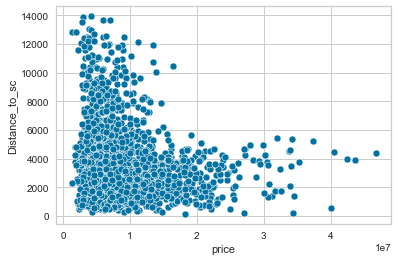

In [188]:
sns.scatterplot(data=normalisation_data, x="price", y="Distance_to_sc")

The liniearity has to be imprved between Distance_to_sc and price. The scatterplot is concentrated more on the left hand side. 

**travel_min_to_CBD Vs. Price**

<AxesSubplot:xlabel='price', ylabel='travel_min_to_CBD'>

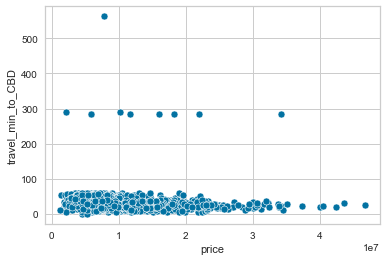

In [189]:
sns.scatterplot(data=normalisation_data, x="price", y="travel_min_to_CBD")

The relationship looks linear to some extent but let's see if this can be improved later.

**Distance_to_hospital Vs. Price**

<AxesSubplot:xlabel='price', ylabel='Distance_to_hospital'>

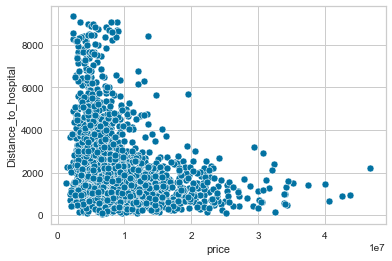

In [190]:
sns.scatterplot(data=normalisation_data, x="price", y="Distance_to_hospital")

The relationship between price and Distance_to_hospital is kind od similar to that of price and Distance_to_sc.

### 4.2  Normalisation and Transformation

We use scikit-learn linrary for standardise data (mean=0, SD=1). The class we are going to use is the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a> class. 
Standardisation is needed for all the variables to plot the histogram and propose a good tranformation.

**Price normalisation/transformation**

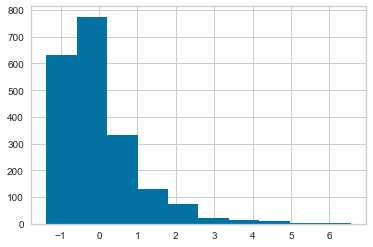

In [191]:
# Standardisation of Price 
std_scale = preprocessing.StandardScaler().fit(normalisation_data[['price']])
df_std = std_scale.transform(normalisation_data[['price']]) # an array not a df
plt.hist(df_std)
plt.show()

(<AxesSubplot:>, <AxesSubplot:>)

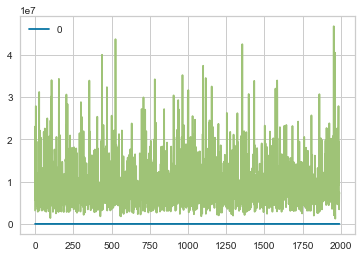

In [192]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline
df_std_st = pd.DataFrame(df_std)
df_std_st.plot(), normalisation_data['price'].plot()

From the hostogram plot and linearity plots we can see that sqrt or log transformation should work for price.
Now performing the sqrt transformation on price. 

(array([ 51., 434., 588., 450., 246., 127.,  58.,  22.,  10.,   5.]),
 array([1118.03398875, 1689.97030643, 2261.90662412, 2833.8429418 ,
        3405.77925949, 3977.71557717, 4549.65189485, 5121.58821254,
        5693.52453022, 6265.4608479 , 6837.39716559]),
 <BarContainer object of 10 artists>)

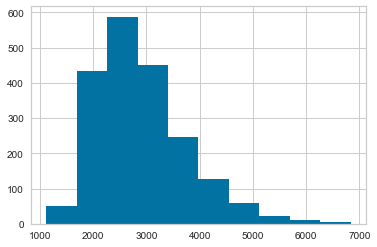

In [193]:
# making a column to the dataset to add values for transformed price
normalisation_data['sqrt_price'] = ""
for i, row in normalisation_data.iterrows():
    # tranforming sqrt to the start
    normalisation_data['sqrt_price'].at[i] = math.sqrt(normalisation_data["price"][i])
plt.hist(normalisation_data['sqrt_price'])

Log transformation on Price.

(array([  4.,  23., 154., 347., 478., 459., 302., 157.,  53.,  14.]),
 array([12.77853366, 13.10819233, 13.43785101, 13.76750968, 14.09716836,
        14.42682703, 14.7564857 , 15.08614438, 15.41580305, 15.74546173,
        16.0751204 ]),
 <BarContainer object of 10 artists>)

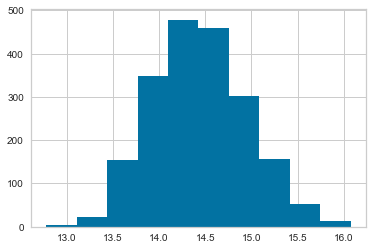

In [194]:
# making a column to the dataset to add values for transformed price
normalisation_data['log_price'] = ""

for i, row in normalisation_data.iterrows():
    # tranforming log to the base 3 for the start
    normalisation_data['log_price'].at[i] = math.log(normalisation_data["price"][i],3)

plt.hist(normalisation_data['log_price'])

Log transformation for Price is better than sqrt. 

**“Distance_to_sc” normalisation/transformation**

It is important to standardise each variabale to get a better boxplot.

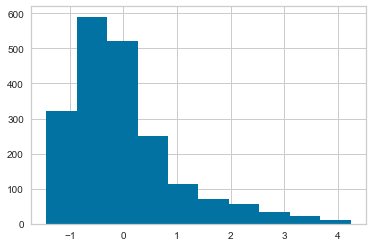

In [195]:
# Standardisation to see the box plot of Distance_to_sc
std_scale = preprocessing.StandardScaler().fit(normalisation_data[['Distance_to_sc']])
df_std = std_scale.transform(normalisation_data[['Distance_to_sc']]) 
plt.hist(df_std)
plt.show()

Let's try log and boxcox transformation for Distance_to_sc.

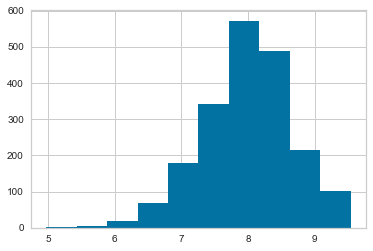

In [196]:
# Log transformation for Distance_to_sc
normalisation_data['log_Distance_to_sc'] = ""

for i, row in normalisation_data.iterrows():
    # tranformating each value to log 
    normalisation_data['log_Distance_to_sc'].at[i] = math.log(normalisation_data["Distance_to_sc"][i])
    
# Plotting the histogram to see if the plot is normalised or not    
plt.hist(normalisation_data['log_Distance_to_sc'])
plt.show()

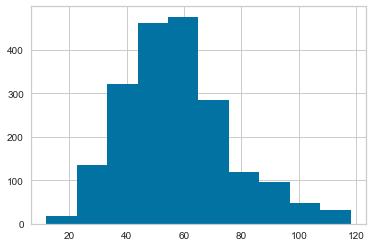

In [197]:
# Sqrt transformation for Distance_to_sc
normalisation_data['sqrt_Distance_to_sc'] = ""

for i, row in normalisation_data.iterrows():
    # tranformating each value to sqrt 
    normalisation_data['sqrt_Distance_to_sc'].at[i] = math.sqrt(normalisation_data["Distance_to_sc"][i])

# Plotting the histogram to see if the plot is normalised or not        
plt.hist(normalisation_data['sqrt_Distance_to_sc'])
plt.show()

From the above to plots it is clear that sqrt transformation is a better choice for Distance_to_sc.

**"travel_min_to_CBD” normalisation/transformation**

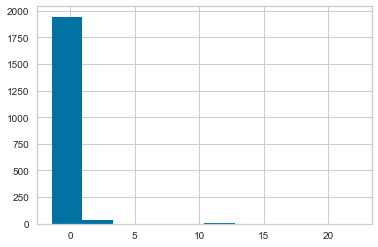

In [198]:
# Standardizing 'travel_min_to_CBD' let's see the histogram
std_scale = preprocessing.StandardScaler().fit(normalisation_data[['travel_min_to_CBD']])
df_std = std_scale.transform(normalisation_data[['travel_min_to_CBD']])
plt.hist(df_std)
plt.show()

From the above plot we can work with sqrt transformation as they seem to normalise the above plots. Log cannot be used in this case as some values in the dataset are set zero. The minimum distance from a property to flinders in some cases is 0 because the property it self is at flinders. 

(array([1.800e+01, 4.870e+02, 1.251e+03, 2.250e+02, 0.000e+00, 0.000e+00,
        7.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

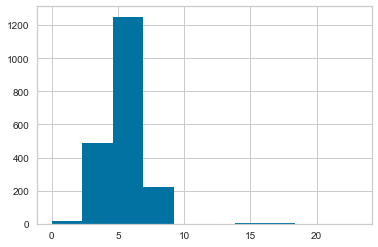

In [199]:
# Sqrt tranformation for travel_min_to_CBD
# assigning a coloumn to the dataset
normalisation_data['sqrt_travel_min_to_CBD'] = 0

# iterating to assign value 
for i, row in normalisation_data.iterrows():
    # tranformating each value to sqrt 
    normalisation_data['sqrt_travel_min_to_CBD'].at[i] = math.sqrt(normalisation_data["travel_min_to_CBD"][i])

# tranformating each value to sqrt 
plt.hist(normalisation_data['sqrt_travel_min_to_CBD'])

travel_min_to_CBD is better nomalised with sqrt tranformation.

**“Distance_to_hospital” normalisation/transformation**

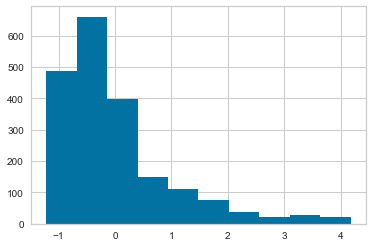

In [200]:
# Standardised histogram for Distance_to_hospital
std_scale = preprocessing.StandardScaler().fit(normalisation_data[['Distance_to_hospital']])
df_std = std_scale.transform(normalisation_data[['Distance_to_hospital']]) # an array not a df
plt.hist(df_std)
plt.show()

Let's check log and sqrt tranformations for Distance_to_hospital.

(array([ 42., 194., 412., 452., 413., 179., 135.,  79.,  46.,  39.]),
 array([ 7.41619849, 16.33998085, 25.26376322, 34.18754559, 43.11132796,
        52.03511032, 60.95889269, 69.88267506, 78.80645743, 87.73023979,
        96.65402216]),
 <BarContainer object of 10 artists>)

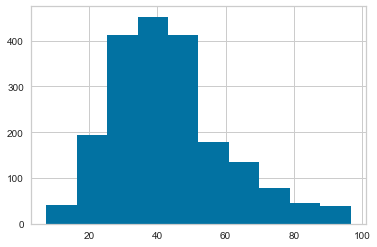

In [201]:
# Sqrt tranformation  for Distance_to_hospital
normalisation_data['sqrt_Distance_to_hospital'] = None

for i, row in normalisation_data.iterrows():
    # Transforming Distance_to_hospital to sqrt 
    normalisation_data['sqrt_Distance_to_hospital'].at[i] = math.sqrt(normalisation_data["Distance_to_hospital"][i])

# Plotting histogram for sqrt_Distance_to_hospital
plt.hist(normalisation_data['sqrt_Distance_to_hospital'])

(array([  3.,  11.,  27.,  71., 182., 372., 539., 435., 241., 110.]),
 array([4.00733319, 4.52082743, 5.03432168, 5.54781592, 6.06131017,
        6.57480441, 7.08829866, 7.6017929 , 8.11528715, 8.6287814 ,
        9.14227564]),
 <BarContainer object of 10 artists>)

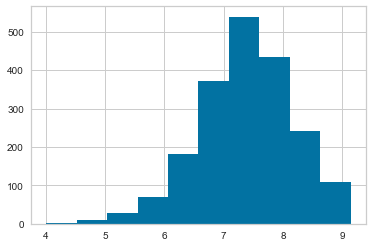

In [202]:
# log tranformation  for Distance_to_hospital
normalisation_data['log_Distance_to_hospital'] = ""

for i, row in normalisation_data.iterrows():
    # Transforming Distance_to_hospital to log 
    normalisation_data['log_Distance_to_hospital'].at[i] = math.log(normalisation_data["Distance_to_hospital"][i])

# Plotting histogram for log_Distance_to_hospital
plt.hist(normalisation_data['log_Distance_to_hospital'])

From the above transformations we can see log tranfoamtion is better at normalising the histogram for Distance_to_hospital. And will be taken further to check residual plots.

### 4.3 Normalisation/Transformation of variables and effect on residuals

From the above plots we have concluded that the tranformation for the variables should be:
  - Log transformation : "price","Distance_to_hospital"
  - Sqrt Transformation : "Distance_to_sc", "travel_min_to_CBD"
  
The above tranformations will be compared to other transformations too. but first let's see the residual plots with the non tranformed fields. 

Residual plot without transformation


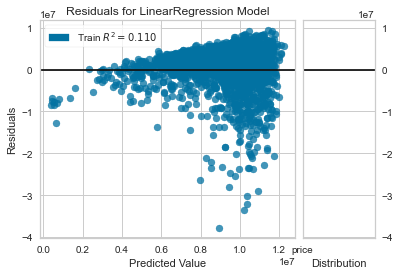

..........................................................


In [203]:
# Residual Plot for the original dataset without any transformation.
# creating a model instance
primary_model =  LinearRegression() 
    
# building a residual plot for the linear regressor. 
residual_visualizer = ResidualsPlot(primary_model)

# fitting the data for the model 
residual_visualizer.fit(normalisation_data[["Distance_to_hospital","Distance_to_sc","travel_min_to_CBD"]]\
                        ,normalisation_data[["price"]])

print("Residual plot without transformation")
# visualising the residual plots
residual_visualizer.show()
    
# line break
print("..........................................................")

Checking the residual with different transformation. Like:
   - Log transformation : "price"
   - Sqrt Transformation : "Distance_to_sc", "travel_min_to_CBD", "Distance_to_hospital

Residual plot with transformation


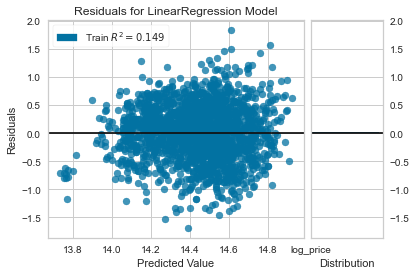

..........................................................


In [204]:
# Residual Plot for the original dataset with transformation.
# creating a model instance
transformed_model1 =  LinearRegression() 
    
# building a residual plot for the linear regressor. 
residual_visualizer = ResidualsPlot(transformed_model1)

# fitting the data for the tranformed feature and target 
residual_visualizer.fit(normalisation_data[["sqrt_Distance_to_hospital","sqrt_Distance_to_sc","sqrt_travel_min_to_CBD"]]\
                        ,normalisation_data[["log_price"]])

print("Residual plot with transformation")
# visualising the residual plots
residual_visualizer.show()
    
# line break
print("..........................................................")

The above transformation has improved the residual plots but we still have to comapre it with our proposed tranformations which we discussed earlier. And learn which is better.

**Let's plot the residual plots for the proposed transformations.**

Residual plot with transformation


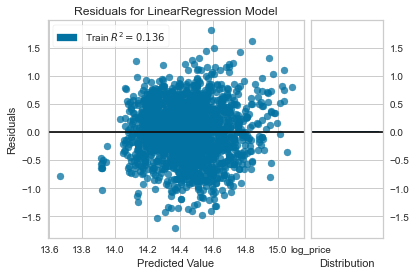

..........................................................


In [205]:
# Residual Plot for the original dataset with transformation.
# creating a model instance
transformed_model2 =  LinearRegression() 
    
# building a residual plot for the linear regressor. 
residual_visualizer = ResidualsPlot(transformed_model2)

# fitting the data for the tranformed feature and target 
residual_visualizer.fit(normalisation_data[["log_Distance_to_hospital","sqrt_Distance_to_sc","sqrt_travel_min_to_CBD"]]\
                        ,normalisation_data[["log_price"]])

print("Residual plot with transformation")
# visualising the residual plots
residual_visualizer.show()
    
# line break
print("..........................................................")

Residual plots after transformation show less scattering and are close to zero. Less variance can be seen by the residuals.
Finally, following transformations are suggested for the given dataset.
  - Log transformation : "price","Distance_to_hospital"
  - Sqrt Transformation : "Distance_to_sc", "travel_min_to_CBD"

## C. Conclusion
The task of data integration has minor details of its own. The dataset provided was very scattered and had low granularity. The task was to merge and present the data into the suggested form. Transformation and normalization of data didn't take much time compared to data integration. Working with shapefiles was interesting and tricky. The assessment gave a clear view as to why normalization and transformation of data are essential for modeling purposes.

## D. References

- Tutorial Week 1-12. 
- Assessment 1 & 2.